**Project Summary: Fine-Grained Object Classification with CIFAR-100**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print(f"Training samples: {x_train.shape[0]}")
print(f"Validation samples: {x_val.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 45000
Validation samples: 5000
Test samples: 10000


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow(x_train, y_train, batch_size=64)
val_gen = val_datagen.flow(x_val, y_val, batch_size=64)
test_gen = test_datagen.flow(x_test, y_test, batch_size=64, shuffle=False)


In [ ]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

model = create_cnn_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,791,396 (6.83 MB)

 Trainable params: 1,789,092 (6.82 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.0574 - loss: 4.7917 - val_accuracy: 0.1646 - val_loss: 3.5205
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.1582 - loss: 3.6299 - val_accuracy: 0.2544 - val_loss: 3.0905
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.2201 - loss: 3.1931 - val_accuracy: 0.2860 - val_loss: 2.8512
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.2708 - loss: 2.8679 - val_accuracy: 0.3348 - val_loss: 2.5912
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.3144 - loss: 2.6792 - val_accuracy: 0.3524 - val_loss: 2.5513
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.3421 - loss: 2.5404 - val_accuracy: 0.3772 - val_loss: 2.4203
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.3688 - loss: 2.4126 - val_accuracy: 0.4050 - val_loss: 2.2544
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.3891 - loss: 2.3306 - val_accurac

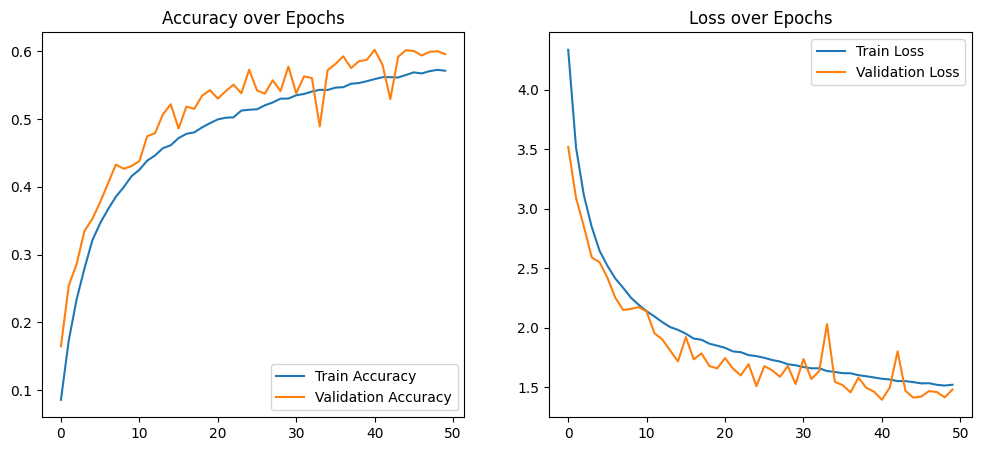

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5788 - loss: 1.5529

Test Accuracy: 57.66%


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


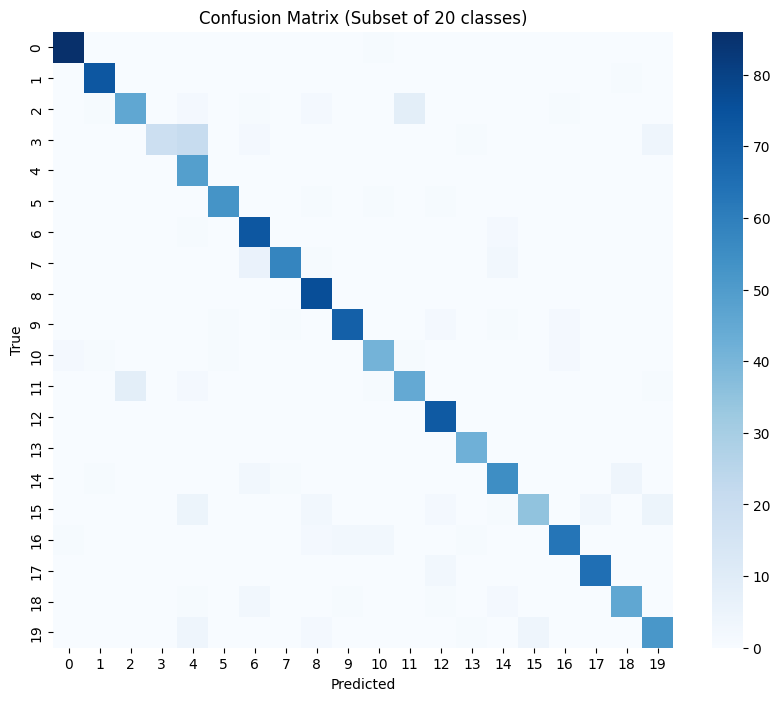

In [ ]:
y_pred = np.argmax(model.predict(test_gen), axis=1)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm[:20,:20], cmap='Blues', annot=False)
plt.title('Confusion Matrix (Subset of 20 classes)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


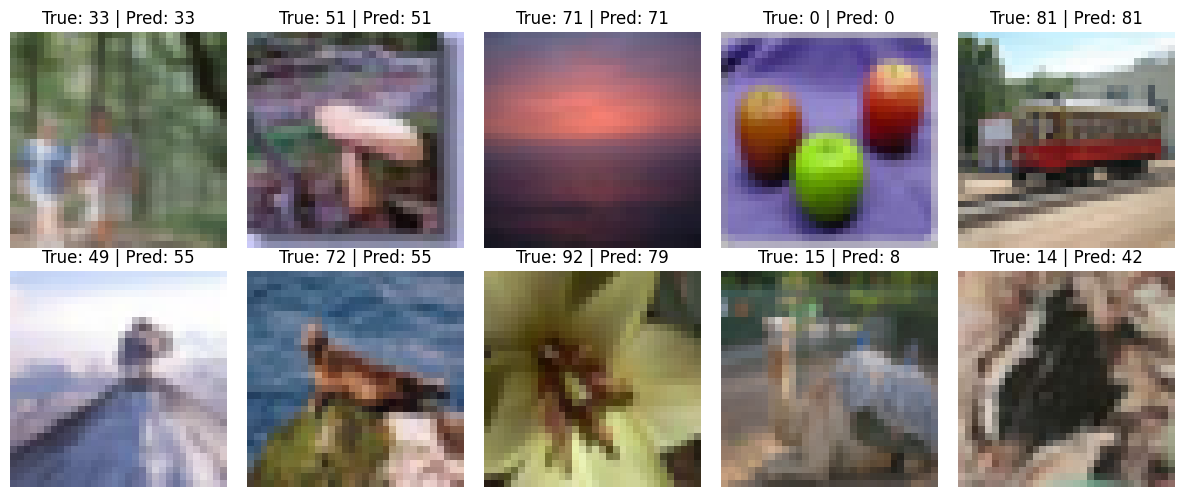

In [ ]:
correct_idx = np.where(y_pred == y_true)[0]
incorrect_idx = np.where(y_pred != y_true)[0]

plt.figure(figsize=(12,5))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]} | Pred: {y_pred[idx]}")
    plt.axis('off')

for i, idx in enumerate(incorrect_idx[:5]):
    plt.subplot(2,5,i+6)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]} | Pred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.835     0.860     0.847       100
           1      0.811     0.730     0.768       100
           2      0.667     0.460     0.544       100
           3      0.452     0.190     0.268       100
           4      0.247     0.490     0.329       100
           5      0.646     0.530     0.582       100
           6      0.549     0.730     0.627       100
           7      0.734     0.580     0.648       100
           8      0.589     0.760     0.664       100
           9      0.854     0.700     0.769       100
          10      0.482     0.410     0.443       100
          11      0.446     0.450     0.448       100
          12      0.576     0.720     0.640       100
          13      0.583     0.420     0.488       100
          14      0.655     0.550     0.598       100
          15      0.673     0.350     0.461       100
          16      0.656     0.630     0.643       100
          17      0.833    